# Sales Forecasting

### Background

### Problem Statement
The goal of this project is to predict the sales of each product for the next 28 days from 10 different stores across the three states California, Texas and Wisconsin.

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:

# Credit: The reduce_mem_usage function has been taken from 
# https://gist.github.com/tkazusa/4d9e26d403c73755edc6b77b5b053a43
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object and str(col_type)!= 'category':
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

In [3]:
def data_stats(data):
    print('Info: ')
    print(data.info())
    print('\nFirst few rows of the data:')
    print(data.head())
    print('\nShape of the data:')
    print(data.shape)

In [4]:
#sales_train_validation_data = pd.read_csv('data/sales_train_validation.csv')
#sales_train_validation_data = reduce_mem_usage(sales_train_validation_data)
#calendar_data = pd.read_csv('data/calendar.csv')
#calendar_data = reduce_mem_usage(calendar_data)
#prices_data = pd.read_csv('data/sell_prices.csv')
#prices_data = reduce_mem_usage(prices_data)

In [145]:
#Import DataFrames.
sales=pd.read_csv('sales_train_evaluation.csv')
#sales=reduce_mem_usage(sales)
#val=pd.read_csv('sales_train_validationqd.csv')
#sample=pd.read_csv('sample_submission.csv')
price=pd.read_csv('sell_prices.csv')
calender=pd.read_csv('calendar.csv')

## Analyze Sales Data

In [45]:
data_stats(sales)

Info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30490 entries, 0 to 30489
Columns: 1947 entries, id to d_1941
dtypes: int64(1941), object(6)
memory usage: 452.9+ MB
None

First few rows of the data:
                              id        item_id    dept_id   cat_id store_id  \
0  HOBBIES_1_001_CA_1_evaluation  HOBBIES_1_001  HOBBIES_1  HOBBIES     CA_1   
1  HOBBIES_1_002_CA_1_evaluation  HOBBIES_1_002  HOBBIES_1  HOBBIES     CA_1   
2  HOBBIES_1_003_CA_1_evaluation  HOBBIES_1_003  HOBBIES_1  HOBBIES     CA_1   
3  HOBBIES_1_004_CA_1_evaluation  HOBBIES_1_004  HOBBIES_1  HOBBIES     CA_1   
4  HOBBIES_1_005_CA_1_evaluation  HOBBIES_1_005  HOBBIES_1  HOBBIES     CA_1   

  state_id  d_1  d_2  d_3  d_4  ...  d_1932  d_1933  d_1934  d_1935  d_1936  \
0       CA    0    0    0    0  ...       2       4       0       0       0   
1       CA    0    0    0    0  ...       0       1       2       1       1   
2       CA    0    0    0    0  ...       1       0       2       0       

In [46]:
sales.isnull().sum().sum()

0

In [92]:
#Sum of 0 sales items.
zero_counts = (sales.iloc[:,6:]==0).sum(axis=1)
zero_counts.shape

(30490,)

In [97]:
(zero_counts[zero_counts> np.round(1913/2)]).shape

(24080,)

Out of 30490 rows, 24080 (i.e. 78% of) rows have more than 50% 0 values for unit sales

In [98]:
date = [col for col in sales.columns if col.startswith('d_')]
#date

In [48]:
sales['state_id'].value_counts(normalize=True)

CA    0.4
TX    0.3
WI    0.3
Name: state_id, dtype: float64

In [49]:
sales['store_id'].value_counts()

TX_1    3049
WI_1    3049
TX_3    3049
CA_3    3049
CA_2    3049
WI_3    3049
CA_4    3049
TX_2    3049
WI_2    3049
CA_1    3049
Name: store_id, dtype: int64

In [50]:
sales['cat_id'].value_counts(normalize=True)

FOODS        0.471302
HOUSEHOLD    0.343391
HOBBIES      0.185307
Name: cat_id, dtype: float64

In [51]:
sales['dept_id'].value_counts(normalize=True)

FOODS_3        0.269925
HOUSEHOLD_1    0.174483
HOUSEHOLD_2    0.168908
HOBBIES_1      0.136438
FOODS_2        0.130535
FOODS_1        0.070843
HOBBIES_2      0.048868
Name: dept_id, dtype: float64

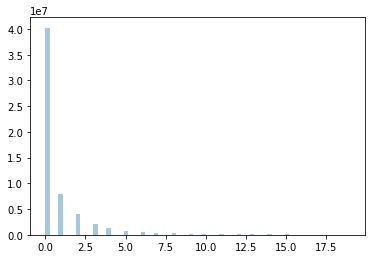

In [133]:
sns.distplot(sales[sales[date]<20],bins=70,kde=False)

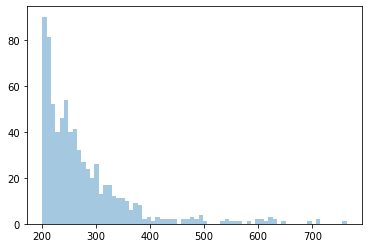

In [130]:
sns.distplot(sales[sales[date]>200],bins=70,kde=False)

In [117]:
sales[date].max()

d_1       360
d_2       436
d_3       207
d_4       323
d_5       296
         ... 
d_1937     77
d_1938     84
d_1939    110
d_1940    156
d_1941    117
Length: 1941, dtype: int64

In [52]:
sales['total_sales'] = sales[date].sum(axis=1)

In [53]:
sales.groupby('state_id').agg({'total_sales':'sum'})

,total_sales
state_id,
CA,29196717
TX,19228405
WI,18502051


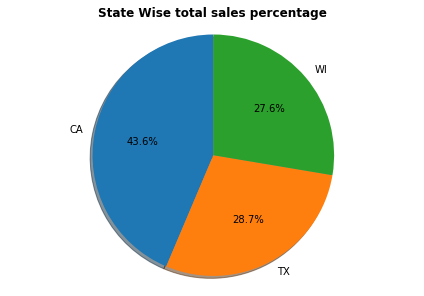

In [54]:
state_wise_sales = sales.groupby('state_id').agg({"total_sales":"sum"})/sales['total_sales'].sum() * 100
state_wise_sales = state_wise_sales.reset_index()
#Plotting the sales ratio
fig1, ax1 = plt.subplots()
ax1.pie(state_wise_sales['total_sales'],labels= state_wise_sales['state_id'] , autopct='%1.1f%%',
        shadow=True, startangle=90)# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.title("State Wise total sales percentage",fontweight = "bold")
plt.show()

In [55]:
sales.groupby(by='cat_id').agg({'total_sales':'sum'})

,total_sales
cat_id,
FOODS,45922427
HOBBIES,6240656
HOUSEHOLD,14764090


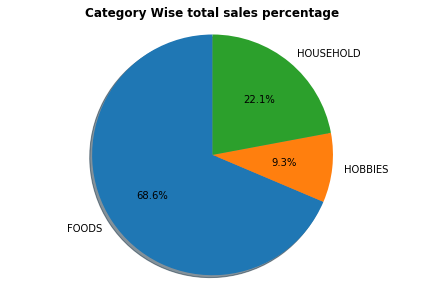

In [56]:
#Caculating the sales ratio for the 3 categories
cat_wise_sales = sales.groupby('cat_id').agg({"total_sales":"sum"})/sales.total_sales.sum() * 100
cat_wise_sales = cat_wise_sales.reset_index()
#Plotting the sales ratio for the 3 categories
fig1, ax1 = plt.subplots()
ax1.pie(cat_wise_sales['total_sales'],labels= cat_wise_sales['cat_id'] , autopct='%1.1f%%',
        shadow=True, startangle=90)# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.title("Category Wise total sales percentage",fontweight = "bold")
plt.show()

In [57]:
sales.groupby(by='store_id').agg({'total_sales':'sum'}).reset_index()

,store_id,total_sales
0,CA_1,7832248
1,CA_2,5818395
2,CA_3,11363540
3,CA_4,4182534
4,TX_1,5692823
5,TX_2,7329642
6,TX_3,6205940
7,WI_1,5261506
8,WI_2,6697988
9,WI_3,6542557


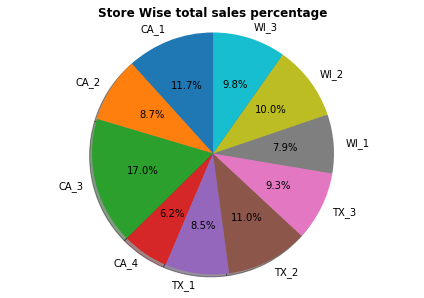

In [58]:
store_wise_sales_data=sales.groupby('store_id').agg({"total_sales":"sum"})/sales.total_sales.sum() * 100
#Plotting the sales ratio for the 10 stores
store_wise_sales_data = store_wise_sales_data.reset_index()
fig1, ax1 = plt.subplots()
ax1.pie(store_wise_sales_data['total_sales'],labels= store_wise_sales_data['store_id'] , autopct='%1.1f%%',
        shadow=True, startangle=90)# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.title("Store Wise total sales percentage",fontweight = "bold")
plt.show()

In [61]:
sales.groupby(['cat_id','state_id']).agg({"total_sales":"sum"}).groupby(['cat_id']).\
apply(lambda x: 100 * x / float(x.sum()))

total_sales
cat_id    state_id             
FOODS     CA          42.541007
          TX          28.683384
          WI          28.775609
HOBBIES   CA          49.603551
          TX          26.024988
          WI          24.371460
HOUSEHOLD CA          44.467807
          TX          30.019927
          WI          25.512267

**Plotting Sales of each category across the 3 states***

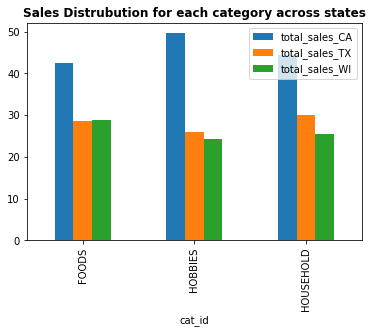

In [62]:
cat_sales =sales.groupby(['cat_id','state_id']).agg({"total_sales":"sum"}).groupby(['cat_id']).\
apply(lambda x: 100 * x / float(x.sum())).unstack()
cat_sales.columns = [f'{i}_{j}' if j != '' else f'{i}' for i,j in cat_sales.columns]
cat_sales.plot(kind='bar', stacked=False)
plt.title("Sales Distrubution for each category across states",fontweight = "bold");

In [63]:
cat_sales.columns

Index(['total_sales_CA', 'total_sales_TX', 'total_sales_WI'], dtype='object')

In [64]:
sales.groupby(['state_id','cat_id']).agg({"total_sales":"sum"}).groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))

total_sales
state_id cat_id                
CA       FOODS        66.911163
         HOBBIES      10.602517
         HOUSEHOLD    22.486319
TX       FOODS        68.503373
         HOBBIES       8.446514
         HOUSEHOLD    23.050113
WI       FOODS        71.421585
         HOBBIES       8.220381
         HOUSEHOLD    20.358035

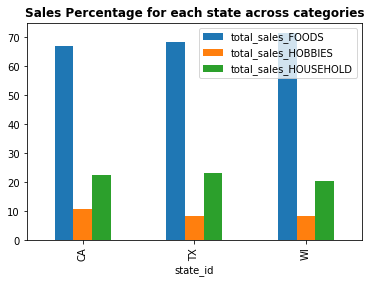

In [65]:
state_sales = sales.groupby(['state_id','cat_id']).agg({"total_sales":"sum"}).groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).unstack()
#Plotting the sales distribution for each state
state_sales.columns = [f'{i}_{j}' if j != '' else f'{i}' for i,j in state_sales.columns]
state_sales.plot(kind='bar', stacked=False)
plt.title("Sales Percentage for each state across categories",fontweight = "bold");

In [66]:
sales.groupby(['cat_id','state_id']).agg({"total_sales":"sum"})

total_sales
cat_id    state_id             
FOODS     CA           19535863
          TX           13172106
          WI           13214458
HOBBIES   CA            3095587
          TX            1624130
          WI            1520939
HOUSEHOLD CA            6565267
          TX            4432169
          WI            3766654

Text(0.5, 1.0, 'Total Sales across Categories and States')

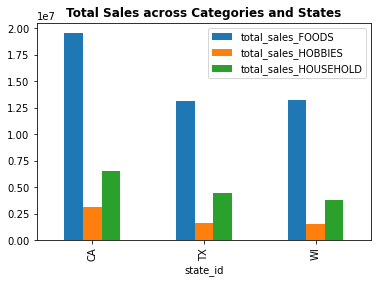

In [67]:
state_cat_sales = sales.groupby(['state_id','cat_id']).agg({"total_sales":"sum"}).unstack()
#Plotting the sales distribution for each state
state_cat_sales.columns = [f'{i}_{j}' if j != '' else f'{i}' for i,j in state_cat_sales.columns]
state_cat_sales.plot(kind='bar', stacked=False)
plt.title("Total Sales across Categories and States",fontweight = "bold")

**Total Sales Dept Vs STore as a percentage**

In [59]:
sales.groupby(by='dept_id').agg({'total_sales':'sum'}).reset_index()

,dept_id,total_sales
0,FOODS_1,5190400
1,FOODS_2,7795025
2,FOODS_3,32937002
3,HOBBIES_1,5699014
4,HOBBIES_2,541642
5,HOUSEHOLD_1,11722853
6,HOUSEHOLD_2,3041237


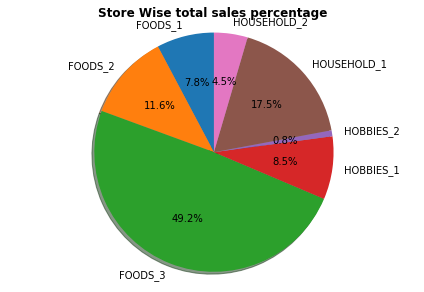

In [60]:
depart_wise_sales_data=sales.groupby('dept_id').agg({"total_sales":"sum"})/sales.total_sales.sum() * 100
#Plotting the sales ratio for the 7 departments
depart_wise_sales_data = depart_wise_sales_data.reset_index()
fig1, ax1 = plt.subplots()
ax1.pie(depart_wise_sales_data['total_sales'],labels= depart_wise_sales_data['dept_id'] , autopct='%1.1f%%',
        shadow=True, startangle=90)# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.title("Store Wise total sales percentage",fontweight = "bold")
plt.show()

Text(0.5, 1.0, 'Total Sales across Categories and States')

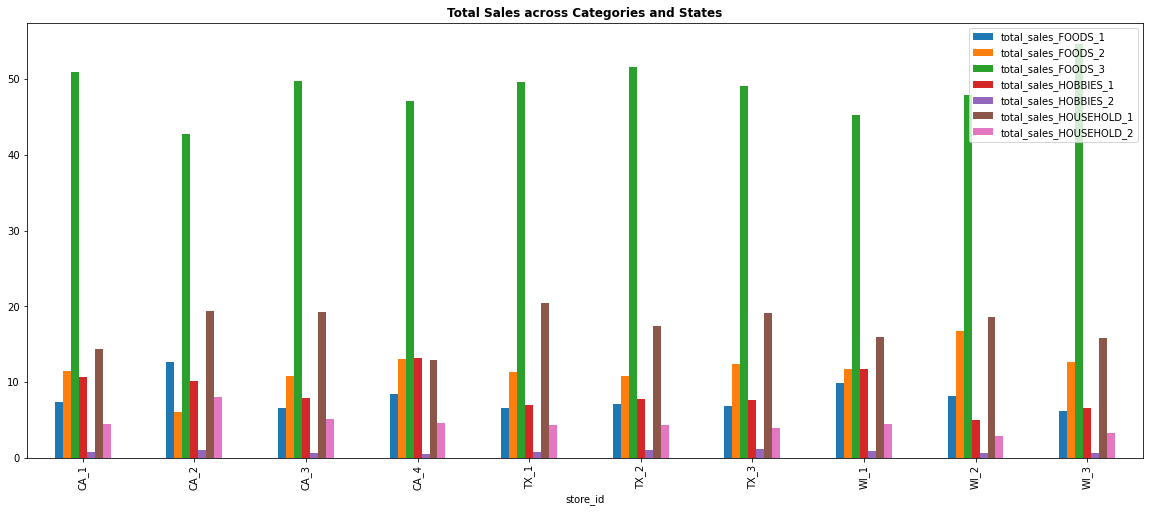

In [74]:

a=sales.groupby(['store_id','dept_id']).agg({"total_sales":"sum"}).groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).unstack()
a.columns = [f'{i}_{j}' if j != '' else f'{i}' for i,j in a.columns]
a.plot(kind='bar', stacked=False,figsize=(20,8))
plt.title("Total Sales across Categories and States",fontweight = "bold")

## Analyze Price Data

In [75]:
data_stats(price)

Info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6841121 entries, 0 to 6841120
Data columns (total 4 columns):
 #   Column      Dtype  
---  ------      -----  
 0   store_id    object 
 1   item_id     object 
 2   wm_yr_wk    int64  
 3   sell_price  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 208.8+ MB
None

First few rows of the data:
  store_id        item_id  wm_yr_wk  sell_price
0     CA_1  HOBBIES_1_001     11325        9.58
1     CA_1  HOBBIES_1_001     11326        9.58
2     CA_1  HOBBIES_1_001     11327        8.26
3     CA_1  HOBBIES_1_001     11328        8.26
4     CA_1  HOBBIES_1_001     11329        8.26

Shape of the data:
(6841121, 4)


In [119]:
price.isnull().sum().sum()

0

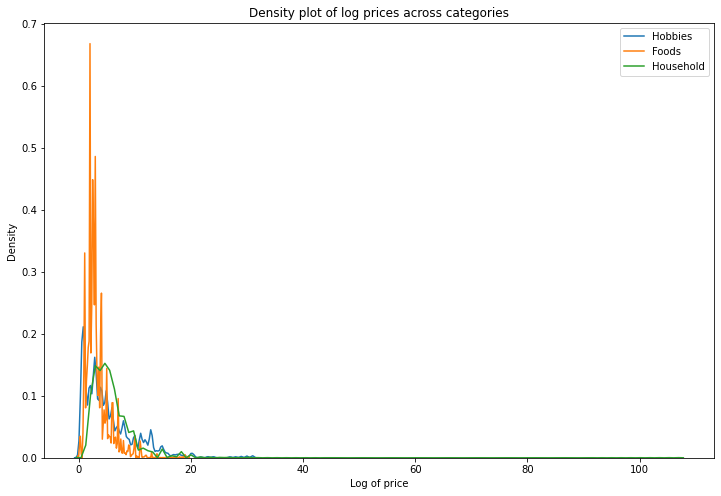

In [144]:
price['category'] = price['item_id'].str.split('_', expand = True)[0]
plt.figure(figsize=(12,8))
p1 = sns.kdeplot(price[price['category']=='HOBBIES']['sell_price'])
p2 = sns.kdeplot(price[price['category']=='FOODS']['sell_price'])
p3 = sns.kdeplot(price[price['category']=='HOUSEHOLD']['sell_price'])
plt.legend(labels=['Hobbies','Foods','Household'])
#plt.xscale('log')
plt.xlabel('Log of price')
plt.ylabel('Density')
plt.title('Density plot of log prices across categories');

## Analyse Calender

In [146]:
data_stats(calender)

Info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1969 entries, 0 to 1968
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          1969 non-null   object
 1   wm_yr_wk      1969 non-null   int64 
 2   weekday       1969 non-null   object
 3   wday          1969 non-null   int64 
 4   month         1969 non-null   int64 
 5   year          1969 non-null   int64 
 6   d             1969 non-null   object
 7   event_name_1  162 non-null    object
 8   event_type_1  162 non-null    object
 9   event_name_2  5 non-null      object
 10  event_type_2  5 non-null      object
 11  snap_CA       1969 non-null   int64 
 12  snap_TX       1969 non-null   int64 
 13  snap_WI       1969 non-null   int64 
dtypes: int64(7), object(7)
memory usage: 215.5+ KB
None

First few rows of the data:
         date  wm_yr_wk    weekday  wday  month  year    d event_name_1  \
0  2011-01-29     11101   Saturday     1      1  2011

In [147]:
calender.isnull().sum()

date               0
wm_yr_wk           0
weekday            0
wday               0
month              0
year               0
d                  0
event_name_1    1807
event_type_1    1807
event_name_2    1964
event_type_2    1964
snap_CA            0
snap_TX            0
snap_WI            0
dtype: int64